<a href="https://colab.research.google.com/github/haimfeld/transformers/blob/main/attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Attention**

**The what? the how? the why?**

# What is Attention?

Attention came from the reaserch paper: "Attention is All You Need" published in 2017 by Vaswani et al. The paper showed the **Transformer model**, which revolutionized the field of natural language processing (NLP).

# Transformers???

Transformer model is a type of *neural network architecture*.
Transformer model was developed to address limitations in traditional sequential models, such as recurrent neural networks (RNNs), by leveraging the power of **self-attention** mechanisms. It eliminates the need for recurrence or convolution, which are common in other architectures.
The key components of the Transformer model are **self-attention** mechanisms and **feed-forward** neural networks. The model is built upon an encoder-decoder architecture, commonly used in **sequence-to-sequence** tasks.
It can also be used for tasks that only require an encoder, such as text classification or language modeling.

# Self Attention????

The self-attention mechanism allows the model to capture relationships between different positions or elements within the input or output sequence. It calculates the importance or relevance of each element with respect to all other elements, creating a **weighted representation** of the entire sequence. This mechanism enables the model to capture long-range dependencies effectively.

# Feed forward?

Multiple layers of interconnected nodes, or neurons, organized in a forward direction, with no loops or feedback connections between the layers.

# Embedding??

The process of converting discrete data, such as words or categorical variables, into continuous vector representations (embeddings) in a high-dimensional space.

The main idea behind word embeddings is that words with similar meanings or contexts in language tend to appear in similar contexts in the data. For example, in a good word embedding model, the vectors for "cat" and "kitten" should be closer together than "cat" and "car."

# sequence to sequence - seq2seq

consists of two main components:
1. Encoder - processes the input sequence and converts it into a fixed-length representation called the context vector. The context vector captures the important information from the input sequence in a condensed form.
2. Decoder - takes the context vector generated by the encoder and generates the output sequence step by step. It does this by predicting each element of the output sequence one at a time, considering the context vector and the previously generated elements.

The training process of a Seq2Seq model involves feeding pairs of input sequences and their corresponding output sequences into the model. The model learns to minimize the difference between its predicted output and the actual output during training.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Define the input sequence length and vocabulary size
input_sequence_length = 4
input_vocab_size = 5

# Define the target sequence length and vocabulary size
target_sequence_length = 5
target_vocab_size = 8

# Define the hidden units for the LSTM layer
hidden_units = 8

# Create random input and target data for the example
input_data = np.random.randint(0, input_vocab_size, size=(10, input_sequence_length))
target_data = np.random.randint(0, target_vocab_size, size=(10, target_sequence_length))

# Define the encoder
encoder_inputs = Input(shape=(input_sequence_length, input_vocab_size))
encoder_lstm = LSTM(hidden_units, return_state=True)  # Set return_state=True to get the initial state
_, state_h, state_c = encoder_lstm(encoder_inputs)

# Define the decoder with initial states from the encoder
decoder_inputs = Input(shape=(target_sequence_length, target_vocab_size))
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])

# Define the output layer
output_dense = Dense(target_vocab_size, activation='softmax')
decoder_outputs = output_dense(decoder_outputs)

# Create the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 5)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 8)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 8),          448         ['input_1[0][0]']                
                                 (None, 8),                                                       
                                 (None, 8)]                                                       
                                                                                              

# LSTM???? long short term memory:

LSTM is a type of recurrent neural network (RNN) architecture that is designed to overcome the vanishing gradient problem faced by traditional RNNs. The vanishing gradient problem makes it difficult for RNNs to capture long-range dependencies in sequential data. LSTM networks use a more complex structure with gates to control the flow of information and handle long-term dependencies effectively.

The key components of an LSTM cell are:

* Cell State (Ct): Represents the memory of the cell and helps in capturing long-term dependencies.
* Hidden State (ht): Represents the output of the cell and is used to make predictions or pass information to the next LSTM cell.
The gates in an LSTM cell are:

* Forget Gate (ft): Determines what information to discard from the previous cell state.
* Input Gate (it): Determines what new information to add to the cell state.
* Output Gate (ot): Determines what information to output from the current cell state.


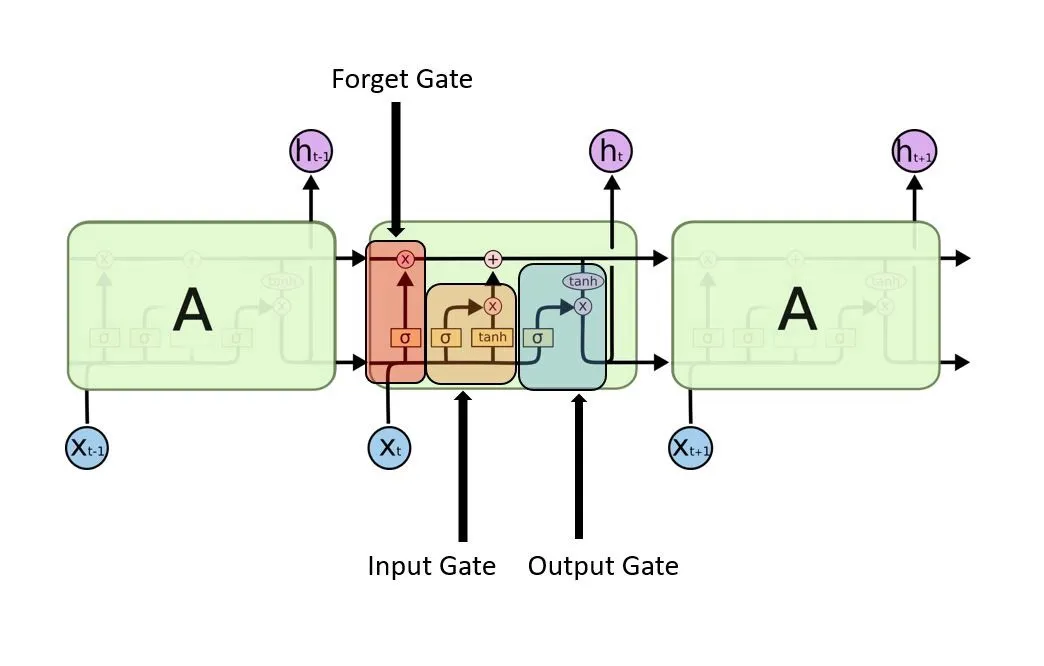

# **Transformers architecture:**

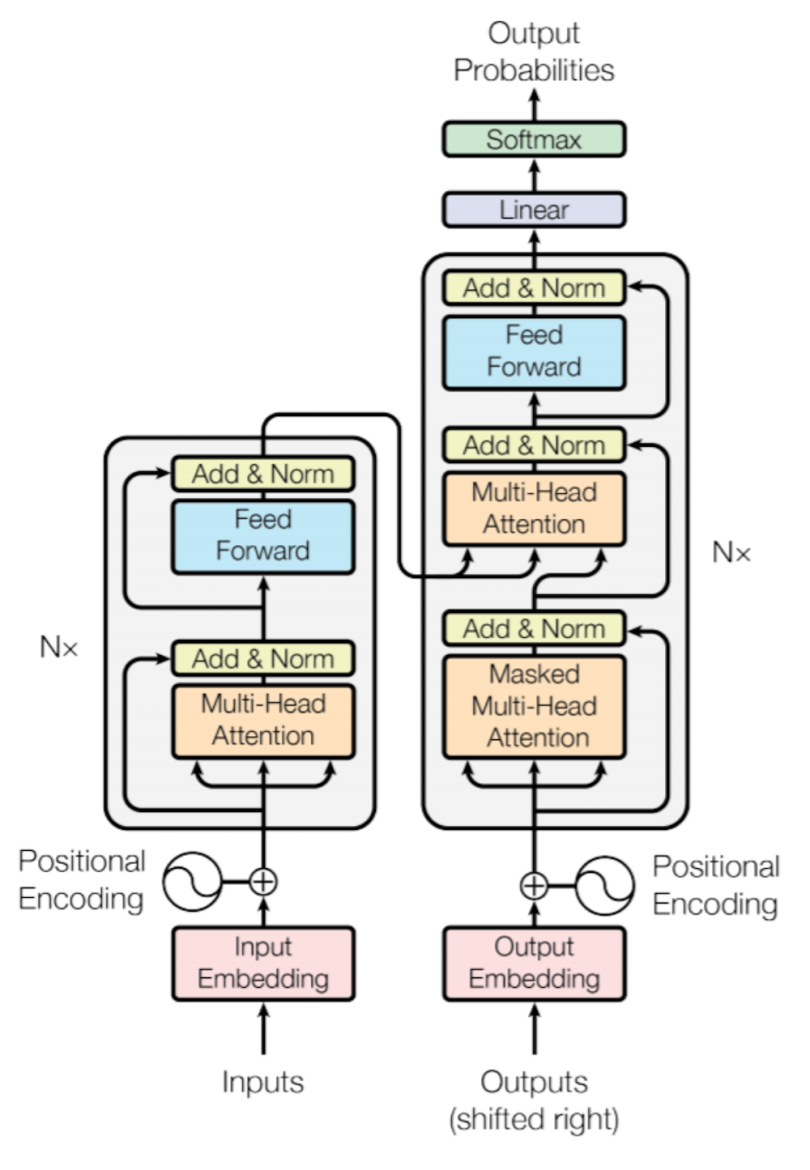

Encoder part (LHS)

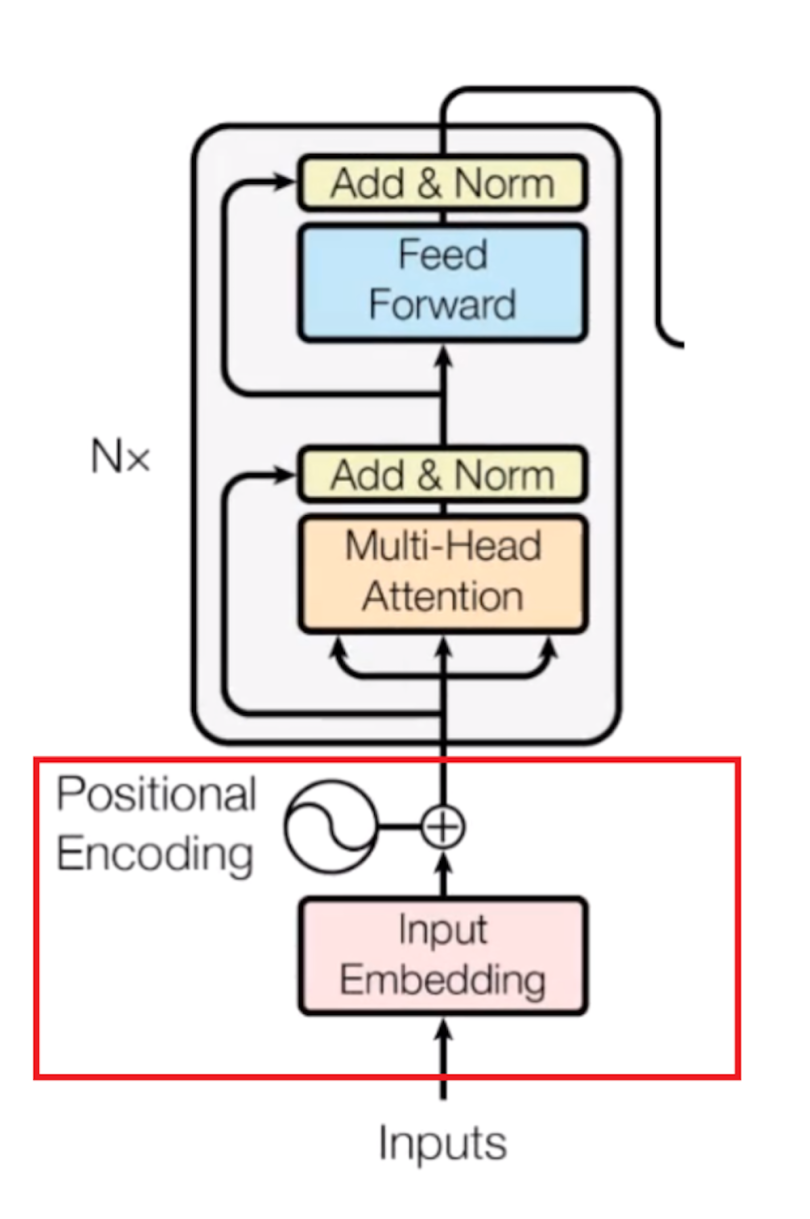

Embedding space, and here every word, according to its meaning, is mapped and assigned with a particular value.

Beacuse each word may take on  different meanings. So, to solve this issue, we use positional encoders. These are vectors that give context according to the position of the word in a sentence.

Word → Embedding → Positional Embedding → Final Vector, framed as Context.

MULTI-HEAD ATTENTION PART
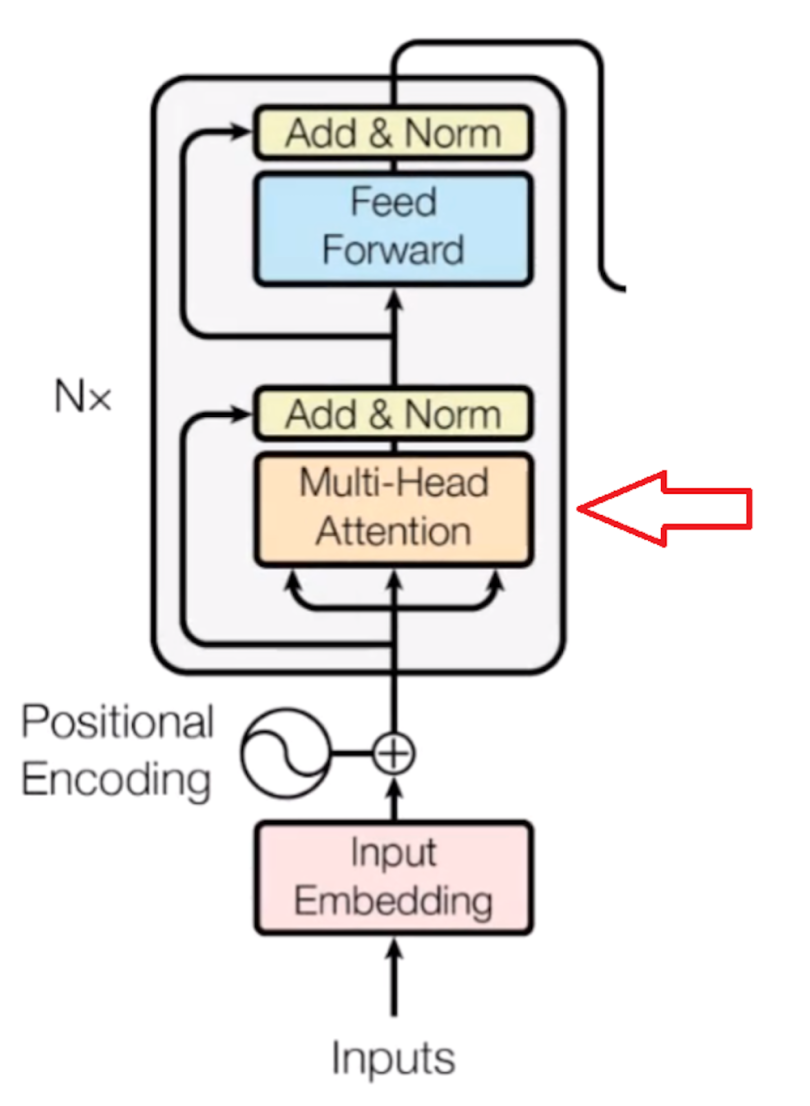

How relevant a particular word is with respect to other words in the sentence?

It is represented as an attention vector. For every word, we can generate an attention vector generated that captures the contextual relationship between words in that sentence.

The only problem now is that, for every word, it weighs its value much higher on itself in the sentence, but we want to know its interaction with other words of that sentence. So, we determine multiple attention vectors per word and take a weighted average to compute the final attention vector of every word.

# Feed forward

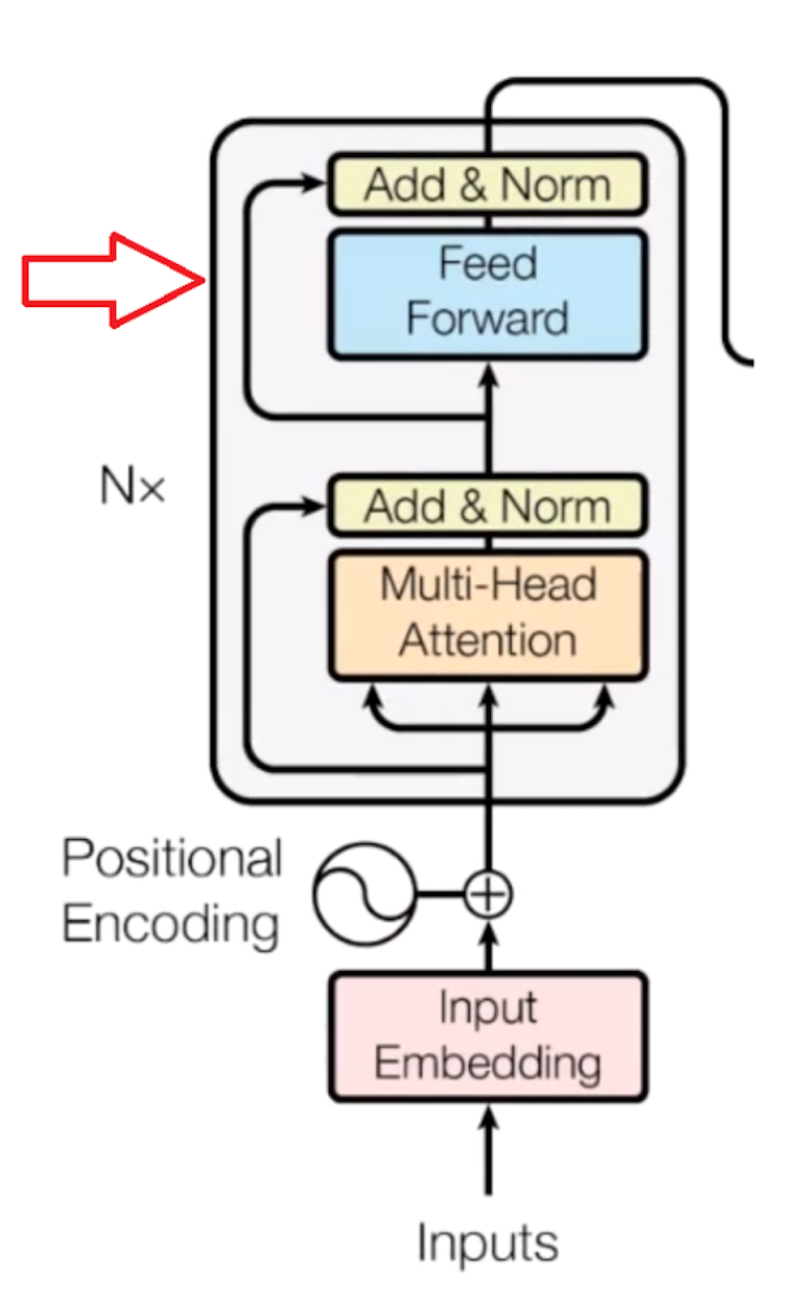

Applied to every attention vector to transform the attention vectors into a form that is acceptable to the next encoder or decoder layer.

The feed-forward network accepts attention vectors one at a time. And the best thing here is, unlike the case of the RNN, each of these attention vectors is independent of one another. So, we can apply parallelization here, and that makes all the difference.

# Decoder block (RHS)

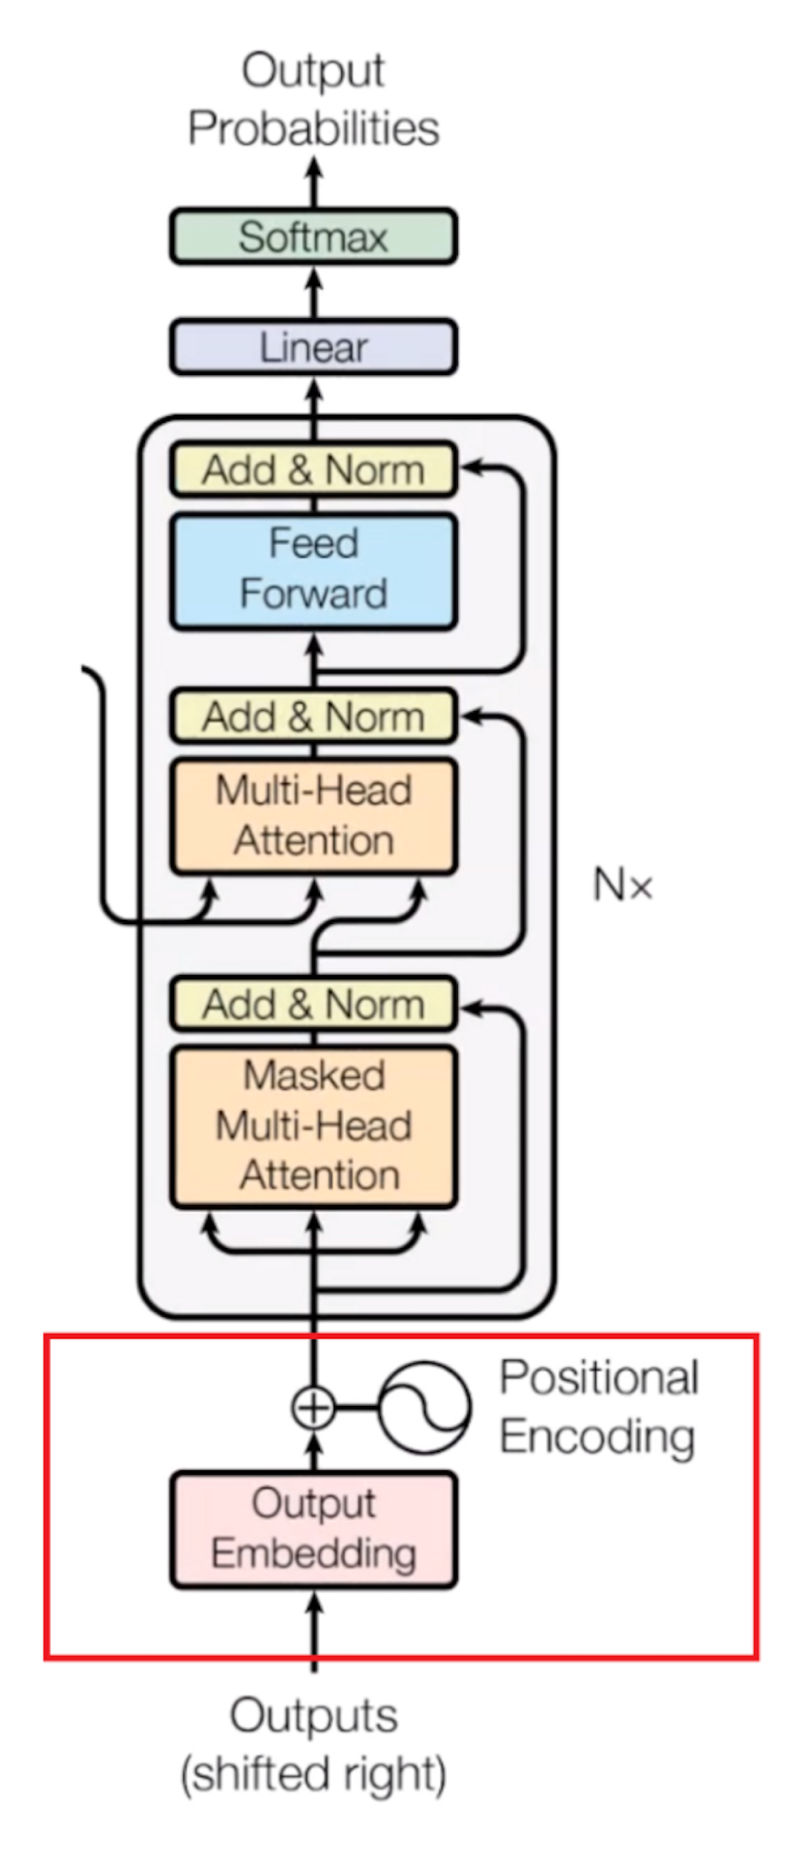

Embedding layer and positional encoder part, which changes the words into respective vectors. This is similar to what we saw in the encoder part.

# MASKED MULTI-HEAD ATTENTION

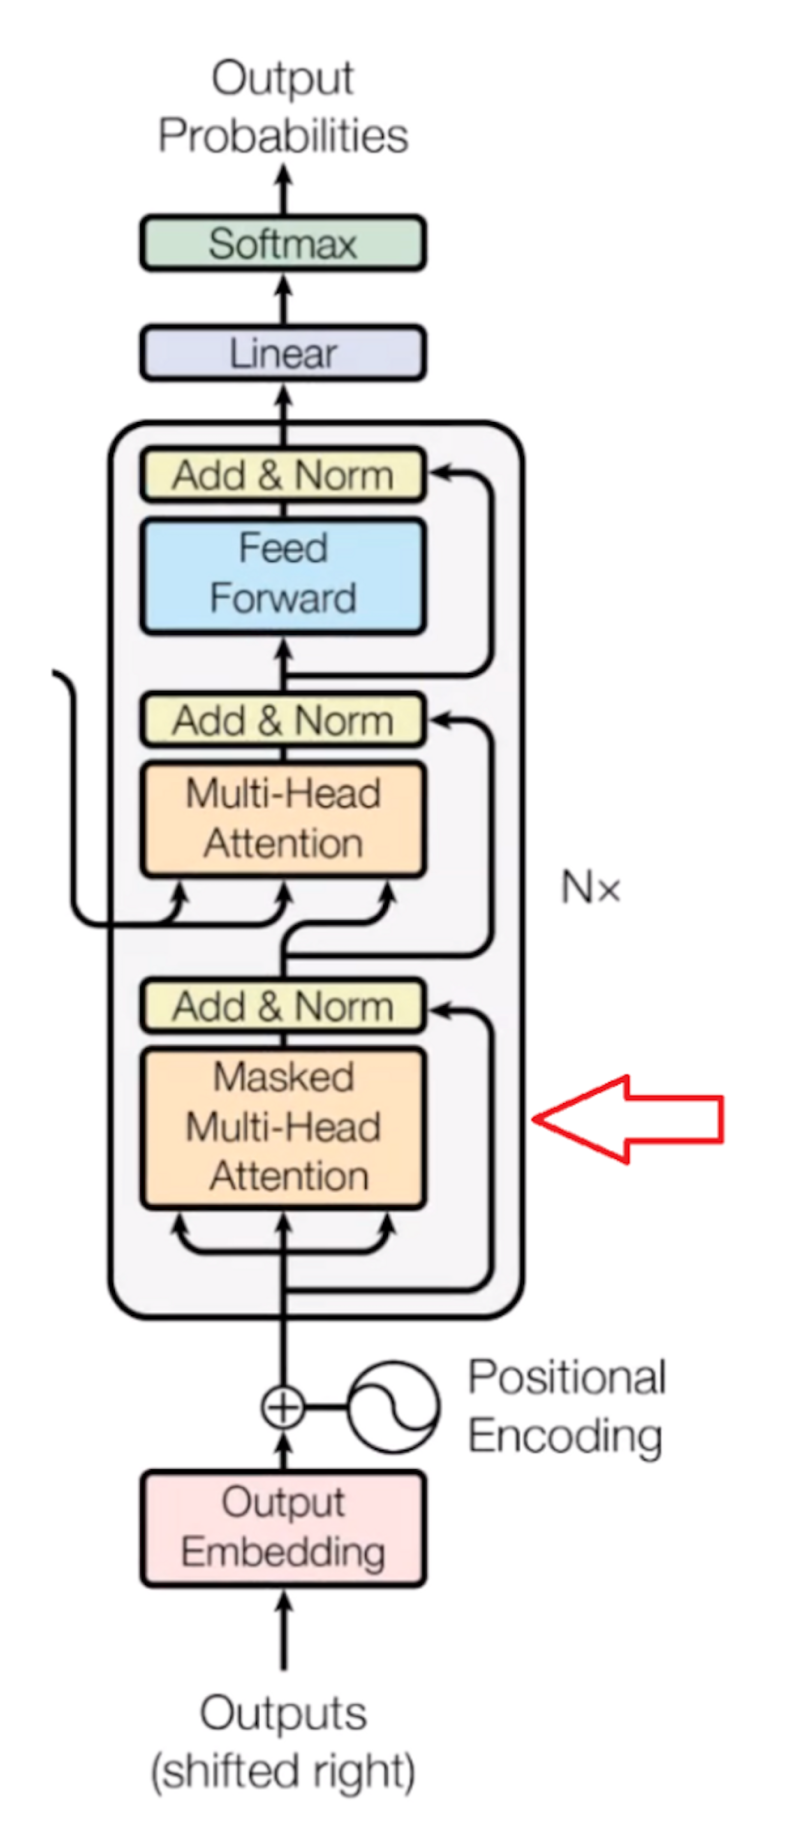

uderstand thrugh an example.

"the can sat on the rug and it was dry cleaned."

'it' fits well with 'cat'

'it' fits well with 'rug'

'rug' fits well with 'dry cleaned'


Masked multihead attention layer looks at all the text (input sequence) and considers the entire context of the sentence (via the attention mechanism) to generate context-aware representations for each position.


# Multihead attention

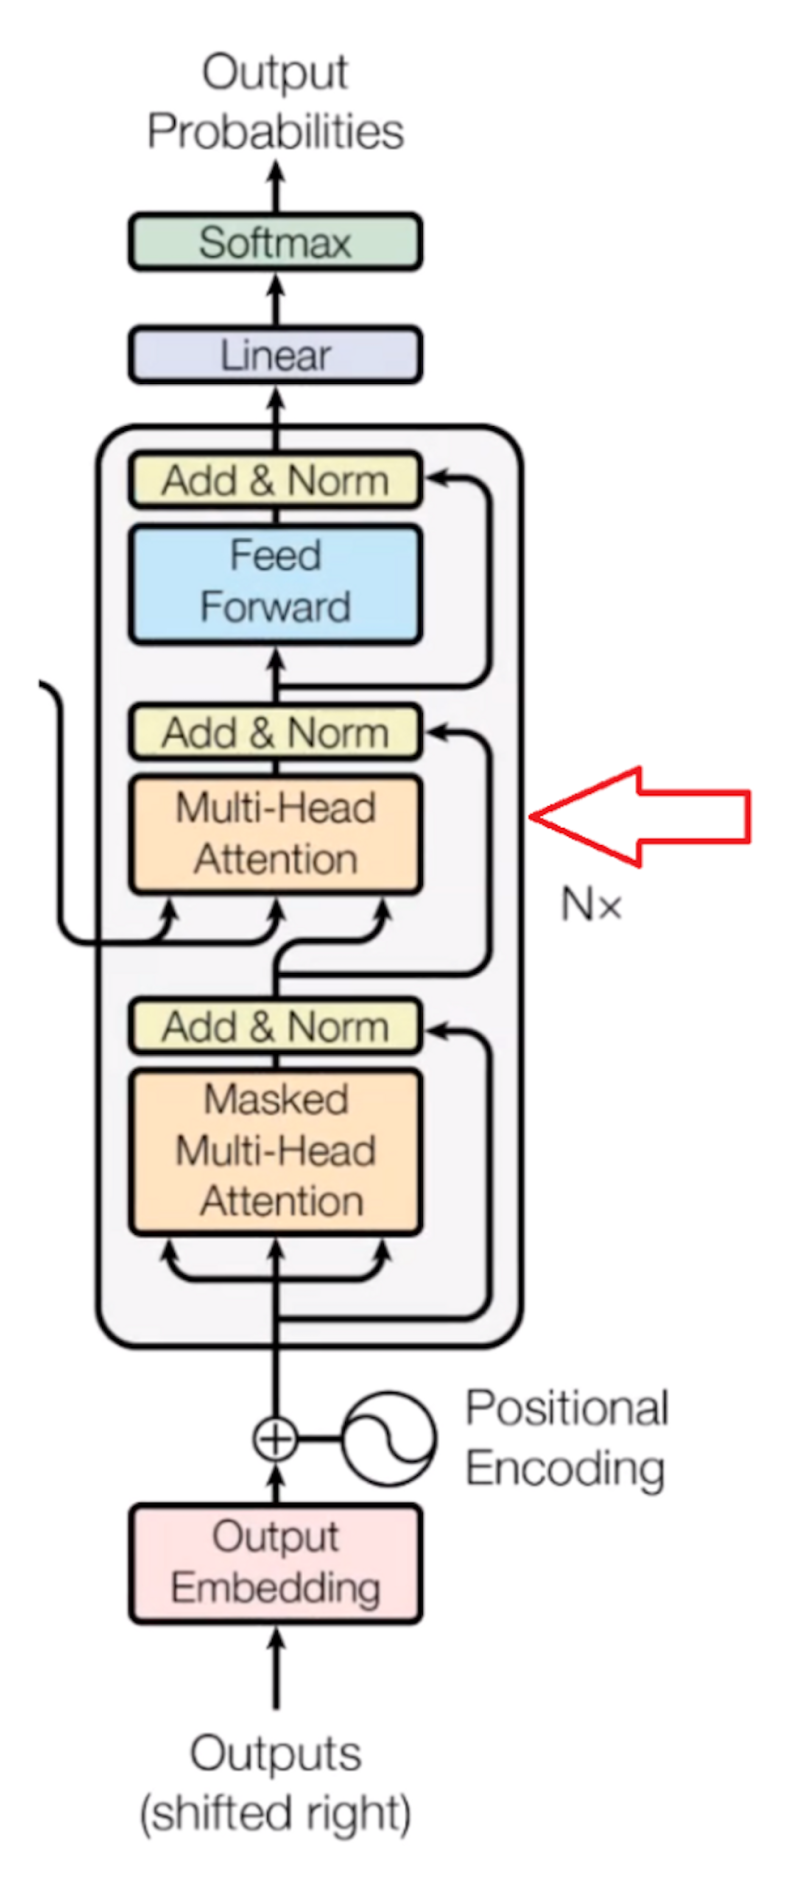

This is where the results from the encoder block also come into the picture.

Assuming we have a traslation problem, from english to french, we have one vector of every word for each English and French sentence, this block actually does the mapping of English and French words and finds out the relation between them. So, this is the part where the main English to French word mapping happens.

The output of this block is attention vectors for every word in the English and French sentences. Each vector represents the relationship with other words in both languages.

# last layer

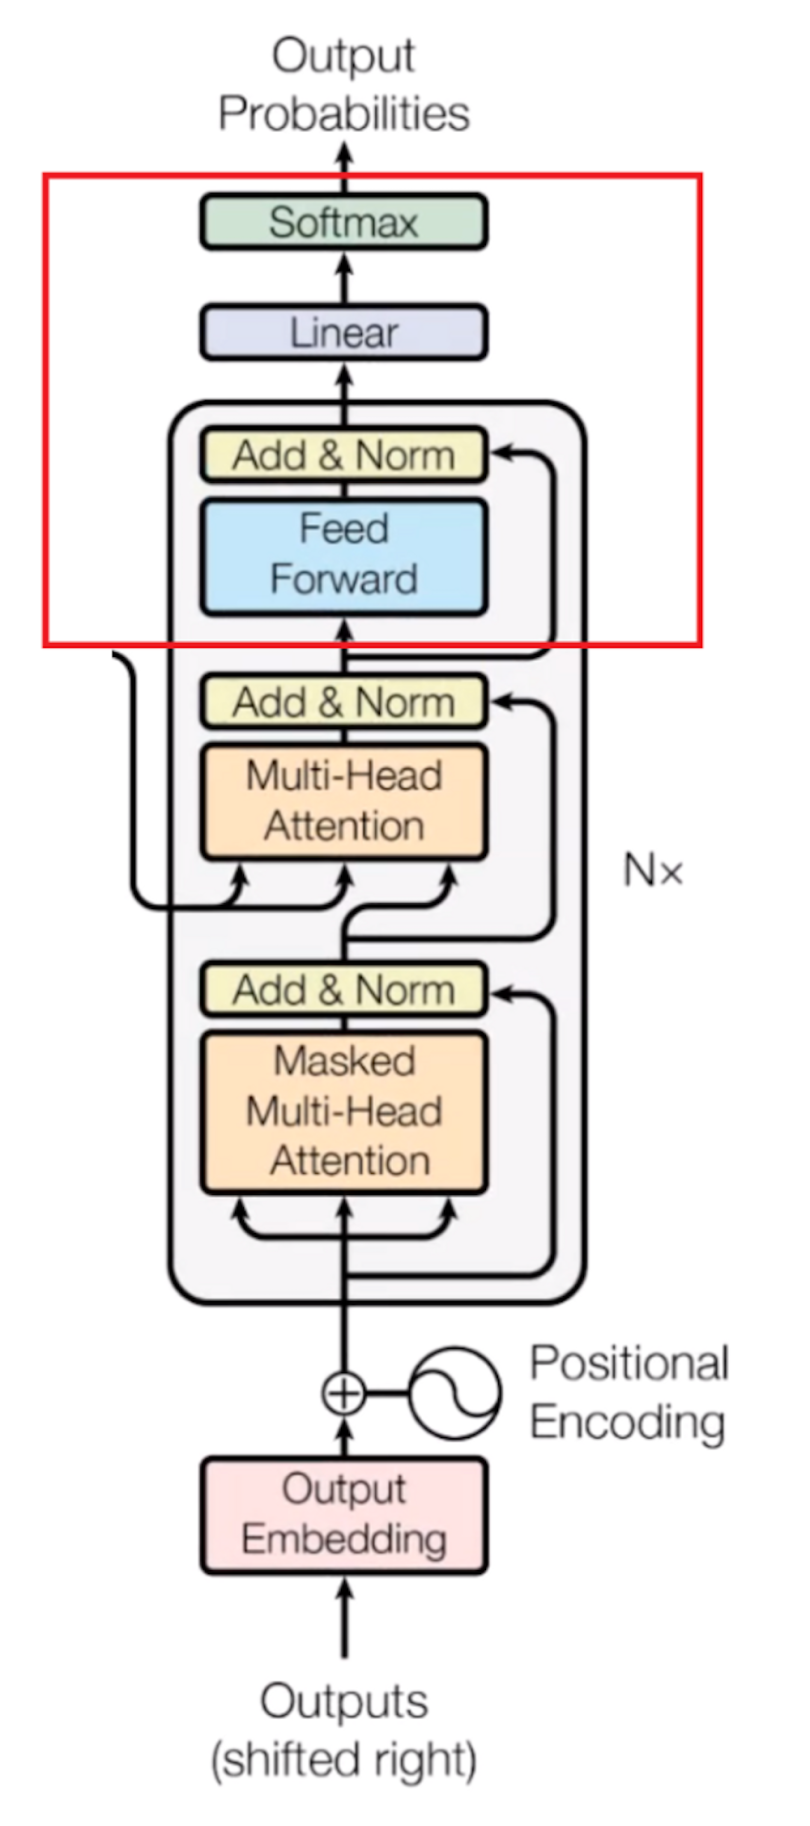

 Now we pass each attention vector into a feed-forward unit, it will make the output vectors into a form that is easily acceptable by another decoder block or a linear layer. A linear layer is another feed-forward layer that expands the dimensions into numbers of words in the French language after translation.

Now it is passed through a softmax layer that transforms the input into a probability distribution, which is human interpretable, and the resulting word is produced with the highest probability after translation.

In [4]:
from transformers import pipeline

In [6]:
translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [9]:
translator("extramly boring lecture for three lines of code.")

[{'translation_text': 'lecture extramly ennuyeuse pour trois lignes de code.'}]

In [2]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
